In [124]:
import pandas as pd 
import pandas_datareader as pdr
import numpy as np
import datetime as dt

#Portfolio Tickers
tickers = ["BTC-USD","ETH-USD","SOL-USD","AVAX-USD","LUNA-USD"]

#Download closing prices
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022, 1, 1)
data = pdr.get_data_yahoo(tickers, start, end)[["Close"]]
data.head()

Attributes         Close                                           
Symbols          BTC-USD      ETH-USD   SOL-USD  AVAX-USD  LUNA-USD
Date                                                               
2020-12-31  29001.720703   737.803406  1.510898  3.135609  0.002901
2021-01-01  29374.152344   730.367554  1.842084  3.664823  0.002937
2021-01-02  32127.267578   774.534973  1.799275  3.494940  0.002567
2021-01-03  32782.023438   975.507690  2.161752  3.472944  0.003283
2021-01-04  31971.914062  1040.233032  2.485097  3.590243  0.003197

In [125]:
#Function that generates random weights based on the number of assets
def genWeights(numAssets):
    #Generate the required number of weights based on how many tickers we have
    weights = np.random.random(numAssets)
    weights = weights/np.sum(weights)
    return weights
    
#Takes in open and close data of tickers, and calculates daily returns
def calcDailyReturns(data):
    #From the opening and closing prices, calculate daily returns
    #dailyReturn = ((data["Close"]-data["Open"])/data["Open"])*100
    #dailyReturn = np.log(data["Close"]/data["Open"])*100
    dailyReturn = np.log(data["Close"].div(data["Close"].shift(1)))*100
    return dailyReturn

#Takes in daily returns of tickers, weights and returns portfolio average returns based on weights
def calcPortMeanReturn(dailyReturn,weights):
    #Calculate mean returns for each stock
    avg_rets = dailyReturn.mean()
    #Calculates the portfolio average returns based on the weights
    port_mean = avg_rets.dot(weights)
    return port_mean

#Generates a Var-Cov Matrix to calculate risk as standard deviation
def calcRisk(dailyReturn):
    # Generate Var-Cov matrix
    cov_matrix = dailyReturn.cov()
    # Calculate portfolio standard deviation based on the weights
    # the .T tranposes the weights matrixs to dot the cov_matrix
    port_risk = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
    return port_risk

In [126]:
num_assets = 5 #Define number of assets in the portfolio
num_portfolios = 10000 #Define number of randomised portfolio weights

returnsData = [] # Define an empty list to store each randomised portfolio returns
riskData = [] # Define an empty list to store each randomised portfolio risk
weightsData = [] # Define an empty list to store each randomised portfolio weights

for portfolio in range(num_portfolios):
    weights = genWeights(num_assets)
    weightsData.append(weights)
    
    dailyReturns = calcDailyReturns(data)
    returns = calcPortMeanReturn(dailyReturns,weights)
    returnsData.append(returns)
    
    risk = calcRisk(dailyReturns)
    riskData.append(risk)
    
df = pd.DataFrame({"portfolio_returns":returnsData,"portfolio_risk":riskData,"portfolio_weights": weightsData})
df.head()

,portfolio_returns,portfolio_risk,portfolio_weights
0,0.761589,5.704436,"[0.14124910890733464, 0.20201691117901738, 0.2..."
1,0.720901,5.574550,"[0.10306932144753964, 0.29831506770232546, 0.2..."
2,0.577920,5.836973,"[0.11245191546209848, 0.3493168503458027, 0.10..."
3,0.568583,5.281911,"[0.2679794888570108, 0.229184565226185, 0.1523..."
4,0.551916,5.912437,"[0.2856592602197508, 0.10664651658421197, 0.15..."


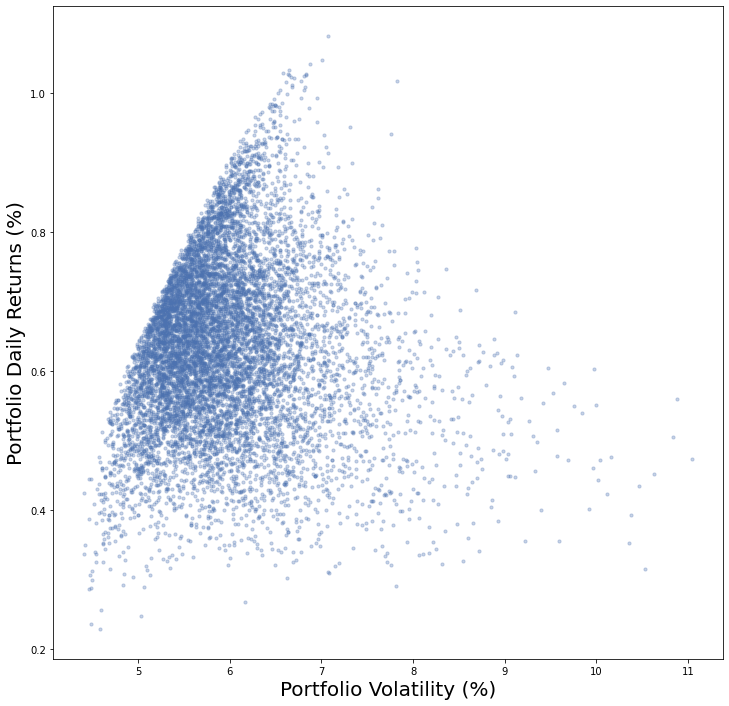

In [128]:
plt.subplots(figsize=[12,12])
plt.xlabel("Portfolio Volatility (%)",size=20)
plt.ylabel("Portfolio Daily Returns (%)",size=20)
plt.scatter(df['portfolio_risk'], df['portfolio_returns'],marker='o', s=10, alpha=0.3)

[0.43037631 0.10217513 0.35506783 0.05646446 0.05591627]


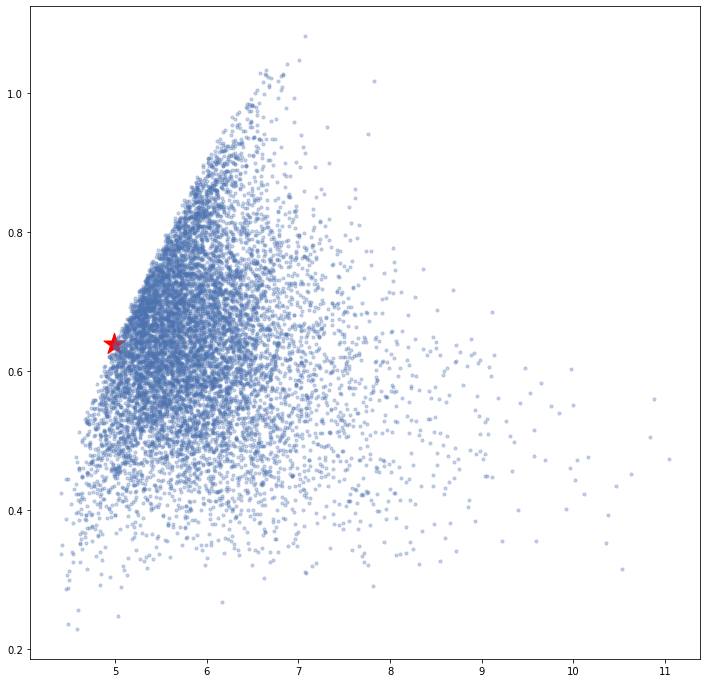

In [133]:
plt.subplots(figsize=[12,12])

#Finding the optimal portfolio given a risk requirement
min_vol_port = df.iloc[df[df['portfolio_risk']<5]["portfolio_returns"].idxmax()]
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(df['portfolio_risk'], df['portfolio_returns'],marker='o', s=10, alpha=0.3)
print(min_vol_port[2])